In [501]:
# import pymysql
# from sqlalchemy import create_engine
# import pandas as pd
# import getpass  # To get the password without showing the input
# password = getpass.getpass()

In [502]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

1. use sakila database
2. use film, category, film_category tables
3. predict film category

In [503]:
# connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
# engine = create_engine(connection_string)

# query1 = 'SELECT f.*, c.name as category FROM film f join film_category fc on f.film_id=fc.film_id join category c on fc.category_id = c.category_id where fc.category_id in (1,2,3,4)'
# df = pd.read_sql_query(query1, engine)
# df.head()

In [504]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

query1 = 'SELECT f.*, fc.category_id FROM film f join film_category fc on f.film_id=fc.film_id where fc.category_id < 5'
df = pd.read_sql_query(query1, engine)
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category_id
0,19,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,1
1,21,AMERICAN CIRCUS,A Insightful Drama of a Girl And a Astronaut w...,2006,1,None,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,1
2,29,ANTITRUST TOMATOES,A Fateful Yarn of a Womanizer And a Feminist w...,2006,1,None,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",2006-02-15 05:03:42,1
3,38,ARK RIDGEMONT,A Beautiful Yarn of a Pioneer And a Monkey who...,2006,1,None,6,0.99,68,25.99,NC-17,"Trailers,Commentaries,Deleted Scenes,Behind th...",2006-02-15 05:03:42,1
4,56,BAREFOOT MANCHURIAN,A Intrepid Story of a Cat And a Student who mu...,2006,1,None,6,2.99,129,15.99,G,"Trailers,Commentaries",2006-02-15 05:03:42,1


In [505]:
df = df.drop(['film_id'], axis = 1)

In [506]:
df = df.drop(['title', 'description'], axis = 1)

In [507]:
df = df.drop(['release_year', 'language_id', 'original_language_id', 'last_update'], axis = 1)

In [508]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,special_features,category_id
0,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1
1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",1
2,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",1
3,6,0.99,68,25.99,NC-17,"Trailers,Commentaries,Deleted Scenes,Behind th...",1
4,6,2.99,129,15.99,G,"Trailers,Commentaries",1


In [509]:
df.dtypes

rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
special_features     object
category_id           int64
dtype: object

In [510]:
df['rental_duration'].value_counts()

3    54
6    52
7    49
4    46
5    46
Name: rental_duration, dtype: int64

In [511]:
df['rental_duration'] = df['rental_duration'].astype('object')

In [512]:
df['rental_rate'].value_counts()

0.99    94
2.99    86
4.99    67
Name: rental_rate, dtype: int64

In [513]:
df['rental_rate'] = df['rental_rate'].astype('object')

In [514]:
df['replacement_cost'].value_counts()

29.99    19
12.99    19
27.99    17
14.99    15
13.99    14
28.99    14
22.99    13
16.99    12
23.99    12
18.99    12
26.99    11
24.99    11
20.99    10
21.99    10
17.99     9
10.99     9
19.99     9
11.99     9
15.99     8
25.99     7
9.99      7
Name: replacement_cost, dtype: int64

In [515]:
df['special_features'].value_counts()

Trailers,Commentaries,Behind the Scenes                   24
Trailers,Behind the Scenes                                21
Deleted Scenes                                            19
Commentaries,Behind the Scenes                            19
Deleted Scenes,Behind the Scenes                          18
Trailers,Deleted Scenes                                   18
Trailers                                                  17
Behind the Scenes                                         16
Trailers,Commentaries                                     16
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    15
Trailers,Deleted Scenes,Behind the Scenes                 14
Trailers,Commentaries,Deleted Scenes                      13
Commentaries                                              13
Commentaries,Deleted Scenes                               12
Commentaries,Deleted Scenes,Behind the Scenes             12
Name: special_features, dtype: int64

In [516]:
def trailer_dummy(x):
    x = x.lower()
    if 'trailers' in x:
        return 1
    else:
        return 0
    
def commentaries_dummy(x):
    x = x.lower()
    if 'commentaries' in x:
        return 1
    else:
        return 0
    
def behind_scenes_dummy(x):
    x = x.lower()
    if 'behind the scenes' in x:
        return 1
    else:
        return 0
    
def deleted_scenes_dummy(x):
    x = x.lower()
    if 'deleted scenes' in x:
        return 1
    else:
        return 0

In [517]:
df['trailer_dummy'] = list(map(trailer_dummy, df['special_features']))
df['commentaries_dummy']= list(map(commentaries_dummy, df['special_features']))
df['behind_scenes_dummy']= list(map(behind_scenes_dummy, df['special_features']))
df['deleted_scenes_dummy']= list(map(deleted_scenes_dummy, df['special_features']))

In [518]:
df = df.drop(['special_features'], axis = 1)

In [519]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,category_id,trailer_dummy,commentaries_dummy,behind_scenes_dummy,deleted_scenes_dummy
0,6,0.99,113,20.99,PG,1,0,1,1,1
1,3,4.99,129,17.99,R,1,0,1,1,0
2,5,2.99,168,11.99,NC-17,1,1,1,0,1
3,6,0.99,68,25.99,NC-17,1,1,1,1,1
4,6,2.99,129,15.99,G,1,1,1,0,0


In [520]:
df.dtypes

rental_duration          object
rental_rate              object
length                    int64
replacement_cost        float64
rating                   object
category_id               int64
trailer_dummy             int64
commentaries_dummy        int64
behind_scenes_dummy       int64
deleted_scenes_dummy      int64
dtype: object

In [521]:
df['trailer_dummy'] = df['trailer_dummy'].astype('object')
df['commentaries_dummy'] = df['commentaries_dummy'].astype('object')
df['behind_scenes_dummy'] = df['behind_scenes_dummy'].astype('object')
df['deleted_scenes_dummy'] = df['deleted_scenes_dummy'].astype('object')

In [522]:
df['rating'].value_counts()

PG-13    57
G        52
NC-17    48
PG       45
R        45
Name: rating, dtype: int64

In [523]:
df_X = df.drop(['category_id'], axis = 1)

In [524]:
df_X_num = df_X.select_dtypes(include = np.number)

In [525]:
df_X_num.dtypes

length                int64
replacement_cost    float64
dtype: object

In [526]:
# df_X_num = df_X_num.drop(['replacement_cost'], axis = 1)

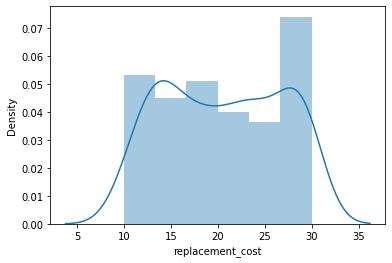

In [527]:
sns.distplot(df_X_num['replacement_cost'])
plt.show()

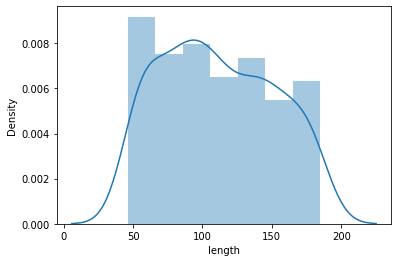

In [528]:
sns.distplot(df_X_num['length'])
plt.show()

In [529]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
transformer = Normalizer().fit(df_X_num)
x_normalized = transformer.transform(df_X_num)
x_num_normalized = pd.DataFrame(x_normalized)

In [530]:
x_num_normalized.head()

,0,1
0,0.983182,0.182628
1,0.990415,0.138121
2,0.997463,0.071188
3,0.934098,0.357018
4,0.992405,0.123012


In [531]:
df_X_cat = df_X.select_dtypes(include = np.object)

In [532]:
df_X_cat.head()

,rental_duration,rental_rate,rating,trailer_dummy,commentaries_dummy,behind_scenes_dummy,deleted_scenes_dummy
0,6,0.99,PG,0,1,1,1
1,3,4.99,R,0,1,1,0
2,5,2.99,NC-17,1,1,0,1
3,6,0.99,NC-17,1,1,1,1
4,6,2.99,G,1,1,0,0


In [533]:
df_X_cat1 = df_X_cat.drop(['trailer_dummy','commentaries_dummy', 'behind_scenes_dummy', 'deleted_scenes_dummy'], axis = 1)

In [534]:
df_X_cat2 = df_X_cat.drop(['rental_duration','rental_rate', 'rating'], axis = 1)

In [535]:
df_X_cat1.head()

,rental_duration,rental_rate,rating
0,6,0.99,PG
1,3,4.99,R
2,5,2.99,NC-17
3,6,0.99,NC-17
4,6,2.99,G


In [536]:
df_X_cat2.head()

,trailer_dummy,commentaries_dummy,behind_scenes_dummy,deleted_scenes_dummy
0,0,1,1,1
1,0,1,1,0
2,1,1,0,1
3,1,1,1,1
4,1,1,0,0


In [537]:
df_X_cat3 = pd.get_dummies(df_X_cat1, drop_first=True)

In [538]:
df_X_cat3.head()

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0


In [539]:
X = np.concatenate((x_num_normalized, df_X_cat2, df_X_cat3), axis=1)
# X = pd.DataFrame(X)
# X.head()

In [540]:
# df['category_id'] = df['category_id'].astype('object')
y = df['category_id']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category_id, dtype: int64

In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [543]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [544]:
classification.score(X_test, y_test)

0.2222222222222222

In [545]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.2222222222222222

In [546]:
pd.Series(predictions).value_counts()

1    34
2    30
3    29
4     6
dtype: int64

In [547]:
y_test.value_counts()

4    28
2    25
1    24
3    22
Name: category_id, dtype: int64

The accuracy of the model on test set is: 0.22 
[[ 5  6 12  1]
 [ 9 11  4  1]
 [ 8  6  5  3]
 [12  7  8  1]]


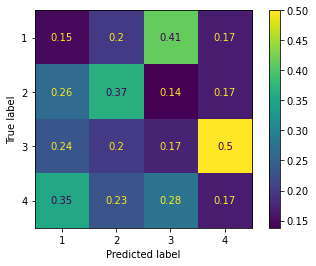

The Kappa of your model is: -0.03


In [548]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import accuracy_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test, normalize='pred')  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))